In [2]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
import pandas as pd
import json

In [4]:
df=pd.read_json('/content/gdrive/MyDrive/dataset/collection_8028.json')

In [5]:
json_string = df.to_json(orient='records')
data = json.loads(json_string)
data

[{'cosmic-wyverns-official': {'node': {'collection': {'name': 'Cosmic Wyverns Official',
     'imageUrl': 'https://i.seadn.io/gae/5cQEFe0l90iE6FD5126wm7G2ngQK-7IRv8rub-7i7aTPwvw3rYYmPw_w02IgcAePalKdjerDQkF3svhUHozzuFhMyiDOatystExb?w=500&auto=format',
     'isVerified': False,
     'slug': 'cosmic-wyverns-official',
     'isCategory': False,
     'id': 'Q29sbGVjdGlvblR5cGU6Mjc5OTk1MA=='},
    'traitCriteria': None,
    'itemQuantity': '1',
    'item': {'__typename': 'AssetType',
     'relayId': 'QXNzZXRUeXBlOjEwNDAwMDM2Mg==',
     'verificationStatus': 'SAFELISTED',
     '__isItemType': 'AssetType',
     'displayName': 'Cosmic Wyverns #2698',
     'assetContract': {'address': '0x01fe2358cc2ca3379cb5ed11442e85881997f22c',
      'id': 'QXNzZXRDb250cmFjdFR5cGU6MzU3MDY3',
      'chain': 'ETHEREUM',
      'blockExplorerLink': 'https://etherscan.io/address/0x01fe2358cc2ca3379cb5ed11442e85881997f22c'},
     'tokenId': '2698',
     'chain': {'identifier': 'ETHEREUM'},
     'animationUrl': None,

In [7]:
from datetime import datetime
token_id_list = []
collection_name_list = []
collection_slug_list = []
date_list = []
total_lists = 0
total_offers = 0
total_list_price = 0
total_bid_price = 0

# Iterate through the data to extract required information
for item in data:
  node_data = item['cosmic-wyverns-official']['node']
  if 'item' in node_data:
    item_data = node_data['item']
    token_id = item_data.get('tokenId', None)  # Use get() to handle missing key
    collection_name = node_data['collection']['name']
    collection_slug = node_data['collection']['slug']
    date = node_data['eventTimestamp']
    total_lists += 1
    if node_data['eventType'] == 'OFFER_ENTERED':
      total_offers += 1
      total_bid_price += float(node_data['perUnitPrice']['usd'])
    if token_id:
      token_id_list.append(token_id)
      collection_name_list.append(collection_name)
      collection_slug_list.append(collection_slug)
      date_list.append(date)

# Convert date strings to datetime objects for comparison
date_list = [datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S.%f').date() for date_str in date_list]

# Create the Rarity column based on the date condition
april_1_2022 = datetime(2022, 4, 1)
rarity_list = [1 if date >= april_1_2022.date() else 0 for date in date_list]

# Create a DataFrame from the extracted data and additional columns
df = pd.DataFrame({
    'Token_id': token_id_list,
    'Collection_Name': collection_name_list,
    'Collection_Slug': collection_slug_list,
    'Date': date_list,
    'Total_Number_of_Lists': total_lists,
    'Total_Number_of_Offers': total_offers,
    'Average_List_Price': total_list_price / total_lists if total_lists > 0 else 0,
    'Average_Bid_Price': total_bid_price / total_offers if total_offers > 0 else 0,
    'Rarity': rarity_list
})

# Group by 'Token_id' and 'Date' and calculate the required aggregations
grouped_df = df.groupby(['Token_id', 'Date']).agg({
    'Collection_Name': 'first',
    'Collection_Slug': 'first',
    'Total_Number_of_Lists': 'sum',
    'Total_Number_of_Offers': 'sum',
    'Average_List_Price': 'mean',
    'Average_Bid_Price': 'mean',
    'Rarity': 'first'
}).reset_index()

# Convert the 'Date' column back to datetime objects without the time component
grouped_df['Date'] = pd.to_datetime(grouped_df['Date'])

# Display the DataFrame
print(grouped_df)


      Token_id       Date          Collection_Name          Collection_Slug  \
0            1 2021-11-16  Cosmic Wyverns Official  cosmic-wyverns-official   
1            1 2021-11-17  Cosmic Wyverns Official  cosmic-wyverns-official   
2            1 2021-11-18  Cosmic Wyverns Official  cosmic-wyverns-official   
3            1 2021-11-19  Cosmic Wyverns Official  cosmic-wyverns-official   
4            1 2021-11-20  Cosmic Wyverns Official  cosmic-wyverns-official   
...        ...        ...                      ...                      ...   
52389      999 2021-11-26  Cosmic Wyverns Official  cosmic-wyverns-official   
52390      999 2021-11-27  Cosmic Wyverns Official  cosmic-wyverns-official   
52391      999 2021-11-28  Cosmic Wyverns Official  cosmic-wyverns-official   
52392      999 2021-12-28  Cosmic Wyverns Official  cosmic-wyverns-official   
52393      999 2022-03-06  Cosmic Wyverns Official  cosmic-wyverns-official   

       Total_Number_of_Lists  Total_Number_of_Offer

In [8]:
grouped_df = grouped_df.sort_values(by='Date')

# Display the DataFrame
grouped_df.sample(5)

Token_id       Date          Collection_Name          Collection_Slug  \
25909     2537 2021-11-28  Cosmic Wyverns Official  cosmic-wyverns-official   
32741     2955 2021-11-16  Cosmic Wyverns Official  cosmic-wyverns-official   
12504     1743 2021-11-23  Cosmic Wyverns Official  cosmic-wyverns-official   
17819     2055 2021-11-19  Cosmic Wyverns Official  cosmic-wyverns-official   
35808     3138 2021-11-19  Cosmic Wyverns Official  cosmic-wyverns-official   

       Total_Number_of_Lists  Total_Number_of_Offers  Average_List_Price  \
25909                1325532                 1254372                 0.0   
32741                 331383                  313593                 0.0   
12504                1988298                 1881558                 0.0   
17819                1988298                 1881558                 0.0   
35808                 994149                  940779                 0.0   

       Average_Bid_Price  Rarity  
25909         396.012523       0  
32741         396.012523       0  
12504         396.012523       0  
17819         396.012523       0  
35808         396.012523       0

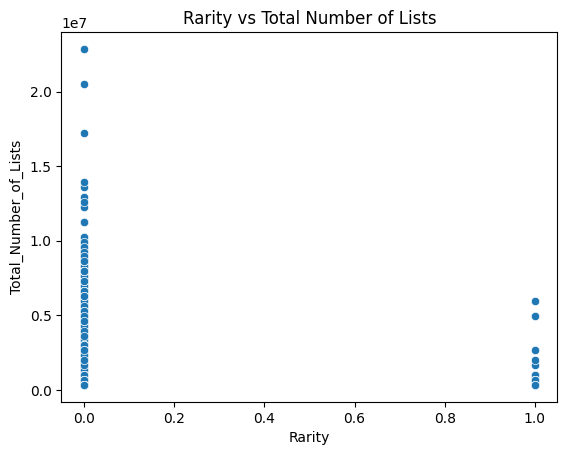

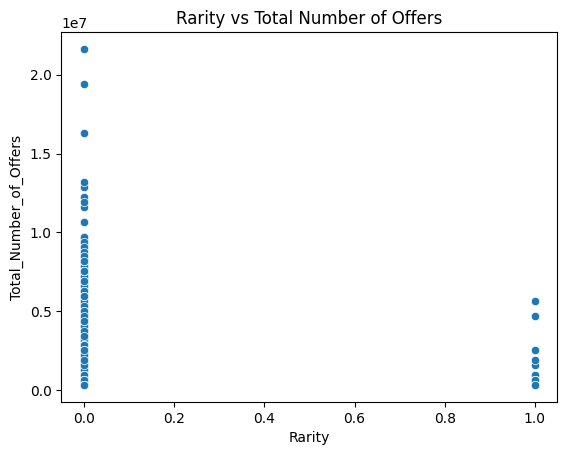

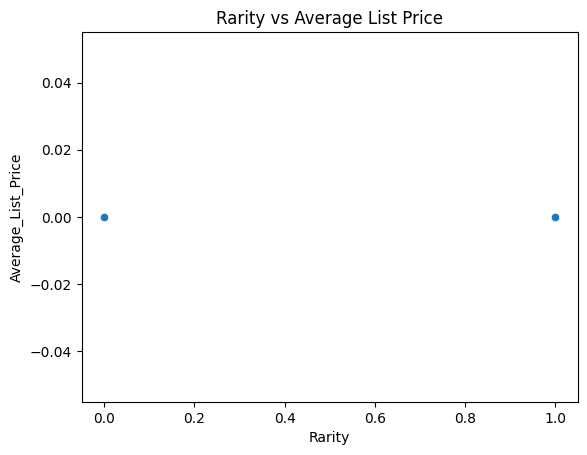

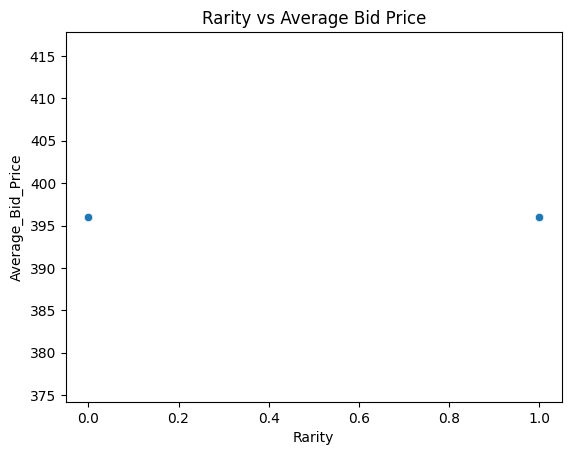

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Rarity vs Total_Number_of_Lists
sns.scatterplot(data=grouped_df, x='Rarity', y='Total_Number_of_Lists')
plt.title('Rarity vs Total Number of Lists')
plt.show()

# Scatter plot for Rarity vs Total_Number_of_Offers
sns.scatterplot(data=grouped_df, x='Rarity', y='Total_Number_of_Offers')
plt.title('Rarity vs Total Number of Offers')
plt.show()

# Scatter plot for Rarity vs Average_List_Price
sns.scatterplot(data=grouped_df, x='Rarity', y='Average_List_Price')
plt.title('Rarity vs Average List Price')
plt.show()

# Scatter plot for Rarity vs Average_Bid_Price
sns.scatterplot(data=grouped_df, x='Rarity', y='Average_Bid_Price')
plt.title('Rarity vs Average Bid Price')
plt.show()


In [10]:
import statsmodels.api as sm

# Define the independent variable (X) and dependent variables (Y)
X = grouped_df[['Rarity']]
Y_lists = grouped_df['Total_Number_of_Lists']
Y_offers = grouped_df['Total_Number_of_Offers']
Y_list_price = grouped_df['Average_List_Price']
Y_bid_price = grouped_df['Average_Bid_Price']

# Fit the OLS model for each dependent variable
model_lists = sm.OLS(Y_lists, sm.add_constant(X)).fit()
model_offers = sm.OLS(Y_offers, sm.add_constant(X)).fit()
model_list_price = sm.OLS(Y_list_price, sm.add_constant(X)).fit()
model_bid_price = sm.OLS(Y_bid_price, sm.add_constant(X)).fit()

# Print the model summaries
print("Model Summary for Total_Number_of_Lists:")
print(model_lists.summary())

print("\nModel Summary for Total_Number_of_Offers:")
print(model_offers.summary())

print("\nModel Summary for Average_List_Price:")
print(model_list_price.summary())

print("\nModel Summary for Average_Bid_Price:")
print(model_bid_price.summary())


Model Summary for Total_Number_of_Lists:
                              OLS Regression Results                             
Dep. Variable:     Total_Number_of_Lists   R-squared:                       0.014
Model:                               OLS   Adj. R-squared:                  0.014
Method:                    Least Squares   F-statistic:                     754.4
Date:                   Thu, 27 Jul 2023   Prob (F-statistic):          6.49e-165
Time:                           12:49:46   Log-Likelihood:            -8.1509e+05
No. Observations:                  52394   AIC:                         1.630e+06
Df Residuals:                      52392   BIC:                         1.630e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1841: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
